In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%matplotlib inline

In [5]:
r = 1.0/2

inital_condition_adj_factor = 0.5
gradient_factor = 1000
iterations = 10000 # points to plot

x0_region1 =  - inital_condition_adj_factor
y0_region1 = r**2 - inital_condition_adj_factor
x0_region2 =  - inital_condition_adj_factor
y0_region2 = r**2  + inital_condition_adj_factor
x0_region3 =  + inital_condition_adj_factor
y0_region3 = r**2  + inital_condition_adj_factor
x0_region4 =  + inital_condition_adj_factor
y0_region4 = r**2 - inital_condition_adj_factor

In [6]:
# plot 1; x dot = 0; 
x1 = np.linspace(-1, 1, 50)
y1 = np.full(len(x1), r**(0.5) )

In [7]:
# plot 2; y dot = 0; 
y2 = np.linspace(-1, 1, 50)
x2 = np.full(len(y2), 0) 

In [12]:
def x_dot(x,y, r):
    return x*r - x**3

def y_dot(x,y, r):
    return -y    

In [13]:
# Region 1 initial conditions
x_output = x0_region1
y_output = y0_region1
x3 = [x_output]
y3 = [y_output]

for i in range(1,iterations):
    x_input = x_output
    y_input = y_output
    x_gradient = x_dot(x_input, y_input, r)
    y_gradient = y_dot(x_input, y_input, r)
    x_output = x_input + x_gradient/gradient_factor
    y_output = y_input + y_gradient/gradient_factor
    x3.append(x_output)
    y3.append(y_output)

In [14]:
# Region 2 initial conditions
x_output = x0_region2
y_output = y0_region2
x4 = [x_output]
y4 = [y_output]

for i in range(1,iterations):
    x_input = x_output
    y_input = y_output
    x_gradient = x_dot(x_input, y_input, r)
    y_gradient = y_dot(x_input, y_input, r)
    x_output = x_input + x_gradient/gradient_factor
    y_output = y_input + y_gradient/gradient_factor
    x4.append(x_output)
    y4.append(y_output)

In [15]:
# Region 3 initial conditions
x_output = x0_region3
y_output = y0_region3
x5 = [x_output]
y5 = [y_output]

for i in range(1,iterations):
    x_input = x_output
    y_input = y_output
    x_gradient = x_dot(x_input, y_input, r)
    y_gradient = y_dot(x_input, y_input, r)
    x_output = x_input + x_gradient/gradient_factor
    y_output = y_input + y_gradient/gradient_factor
    x5.append(x_output)
    y5.append(y_output)

In [16]:
# Region 4 initial conditions
x_output = x0_region4
y_output = y0_region4
x6 = [x_output]
y6 = [y_output]

for i in range(1,iterations):
    x_input = x_output
    y_input = y_output
    x_gradient = x_dot(x_input, y_input, r)
    y_gradient = y_dot(x_input, y_input, r)
    x_output = x_input + x_gradient/gradient_factor
    y_output = y_input + y_gradient/gradient_factor
    x6.append(x_output)
    y6.append(y_output)

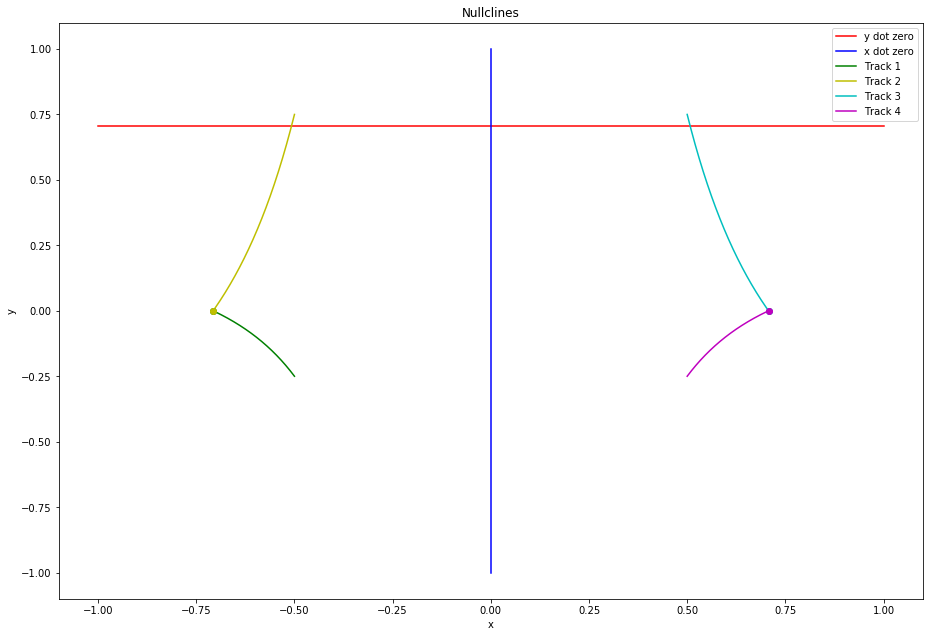

In [17]:
fig = plt.figure()

ax = fig.add_axes([-2,-2,2,2])

ax.plot(x1, y1, 'r', label = "y dot zero") # 'r' is the color red
ax.plot(x2, y2, 'b', label = "x dot zero") 
ax.plot(x3, y3, 'g', label = "Track 1") 
ax.plot(x4, y4, 'y', label = "Track 2") 
ax.plot(x5, y5, 'c', label = "Track 3") 
ax.plot(x6, y6, 'm', label = "Track 4") 

ax.plot(x3[len(x3)-1], y3[len(y3)-1], color="g", marker='o')
ax.plot(x4[len(x4)-1], y4[len(y4)-1], color="y", marker='o')
ax.plot(x5[len(x5)-1], y5[len(y5)-1], color="c", marker='o')
ax.plot(x6[len(x6)-1], y6[len(y6)-1], color="m", marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Nullclines')
ax.legend()

In [19]:
# find steady states
fun = np.array([0,r,0, -1])
roots = np.polynomial.polynomial.polyroots(fun)
roots

array([-0.70710678,  0.        ,  0.70710678])

In [33]:
# find eigenvalues
steady_x0 = roots[0]
steady_x1 = roots[1]
steady_x2 = roots[2]

In [34]:
def coef0(x, r):
    return -r + 3*x**2
def coef1(x, r):
    return 1 - r + 3*x**2

In [35]:
jac0 = np.array([coef0(steady_x0, r), coef1(steady_x0, r), 1]) 
jac1 = np.array([coef0(steady_x1, r), coef1(steady_x1, r), 1])
jac2 = np.array([coef0(steady_x2, r), coef1(steady_x2, r), 1])

In [36]:
eigenvalues_SS0 = np.polynomial.polynomial.polyroots(jac0)
eigenvalues_SS0

array([-1.00000001, -0.99999999])

In [37]:
eigenvalues_SS1 = np.polynomial.polynomial.polyroots(jac1)
eigenvalues_SS1

array([-1. ,  0.5])

In [38]:
eigenvalues_SS2 = np.polynomial.polynomial.polyroots(jac2)
eigenvalues_SS2

array([-1. -1.49011612e-08j, -1. +1.49011612e-08j])

In [27]:
r

0.5